# Imbalanced Datasets and Data Sampling

# Data-Level Methods: Under-Sampling, Over-sampling & Hybrid

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

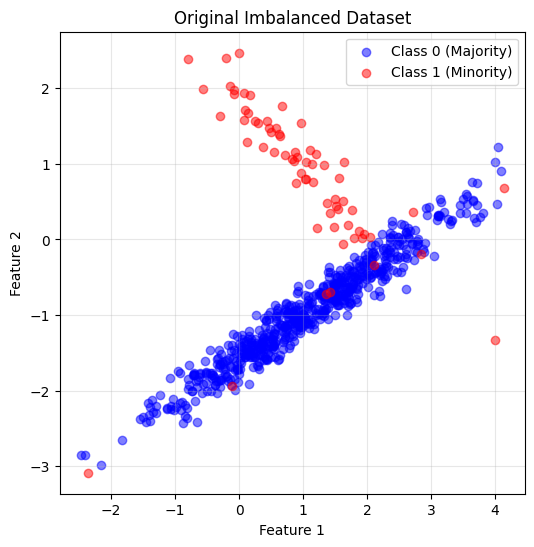

Class distribution: Counter({np.int64(0): 632, np.int64(1): 68})
Class 0: 632 samples (90.29%)
Class 1: 68 samples (9.71%)
--------------------------------------------------


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Plot dataset
def plot_data(X, y, title):
    """Plot data points with different colors for each class"""
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0 (Majority)', alpha=0.5, color='blue')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1 (Minority)', alpha=0.5, color='red')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Print class distribution
    counter = Counter(y)
    print(f"Class distribution: {counter}")
    for label, count in counter.items():
        print(f"Class {label}: {count} samples ({count/len(y)*100:.2f}%)")
    print("-" * 50)

# Create imbalanced dataset
X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=(0.9, 0.1),
        random_state=42
    )
# split the date into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot original data
plot_data(X_train, y_train, "Original Imbalanced Dataset")


# Data Level

## 1. Random Over-sampling

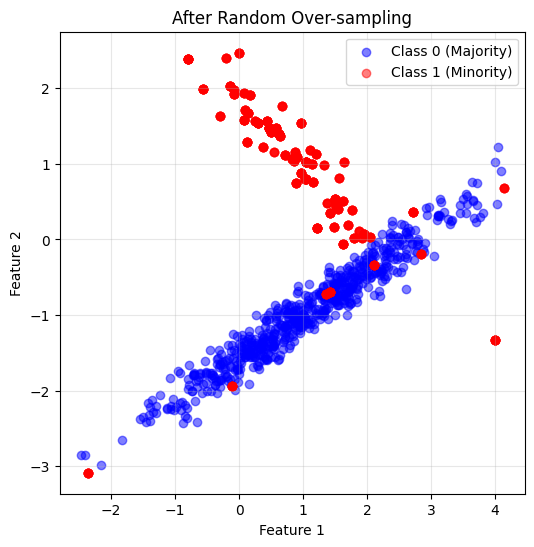

Class distribution: Counter({np.int64(0): 632, np.int64(1): 632})
Class 0: 632 samples (50.00%)
Class 1: 632 samples (50.00%)
--------------------------------------------------


In [ ]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
plot_data(X_ros, y_ros, "After Random Over-sampling")

## 2. Random Under-sampling

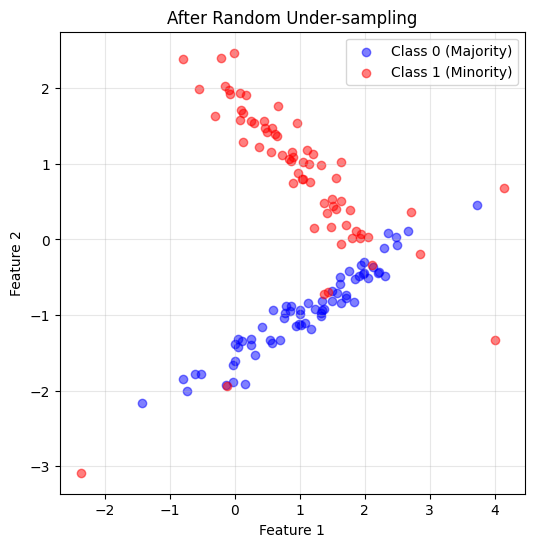

Class distribution: Counter({np.int64(0): 68, np.int64(1): 68})
Class 0: 68 samples (50.00%)
Class 1: 68 samples (50.00%)
--------------------------------------------------


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
plot_data(X_rus, y_rus, "After Random Under-sampling")

## 3. SMOTE (Synthetic Minority Over-sampling Technique)

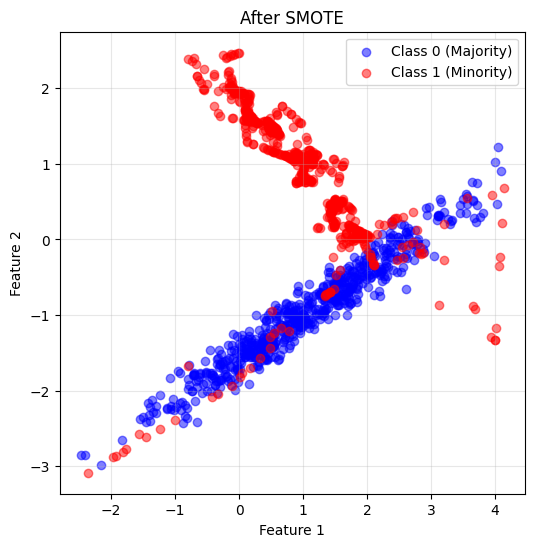

Class distribution: Counter({np.int64(0): 632, np.int64(1): 632})
Class 0: 632 samples (50.00%)
Class 1: 632 samples (50.00%)
--------------------------------------------------


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
plot_data(X_smote, y_smote, "After SMOTE")


## 4. Tomek Links

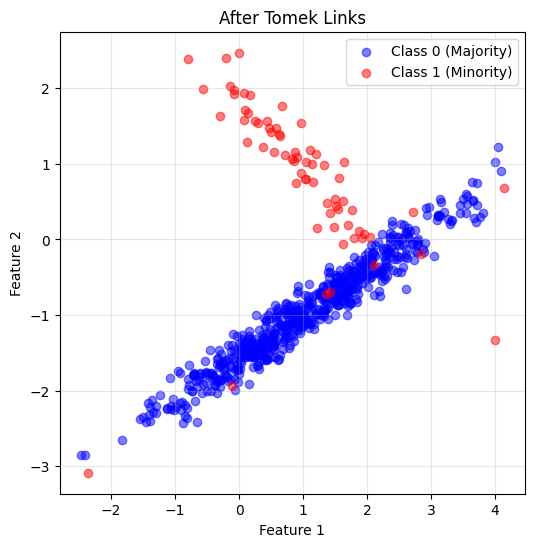

Class distribution: Counter({np.int64(0): 627, np.int64(1): 68})
Class 0: 627 samples (90.22%)
Class 1: 68 samples (9.78%)
--------------------------------------------------


In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)
plot_data(X_tl, y_tl, "After Tomek Links")

## 5. SMOTE + Tomek Links

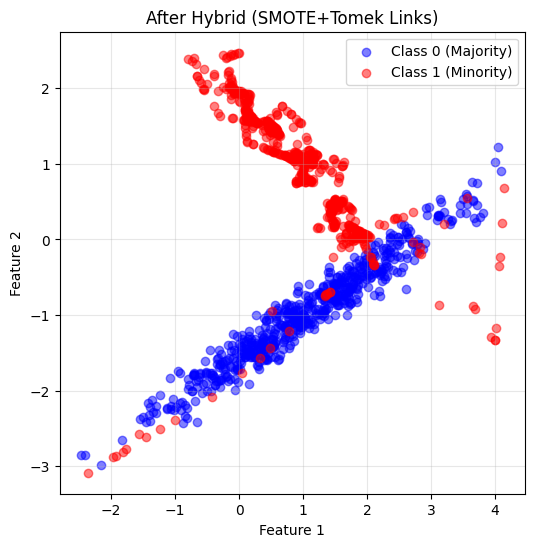

Class distribution: Counter({np.int64(0): 608, np.int64(1): 608})
Class 0: 608 samples (50.00%)
Class 1: 608 samples (50.00%)
--------------------------------------------------


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
smote = SMOTE(random_state=42)
tl = TomekLinks(sampling_strategy="all")
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote_tl, y_smote_tl = tl.fit_resample(X_smote, y_smote)
plot_data(X_smote_tl, y_smote_tl, "After Hybrid (SMOTE+Tomek Links)")

## 6. SMOTETomek

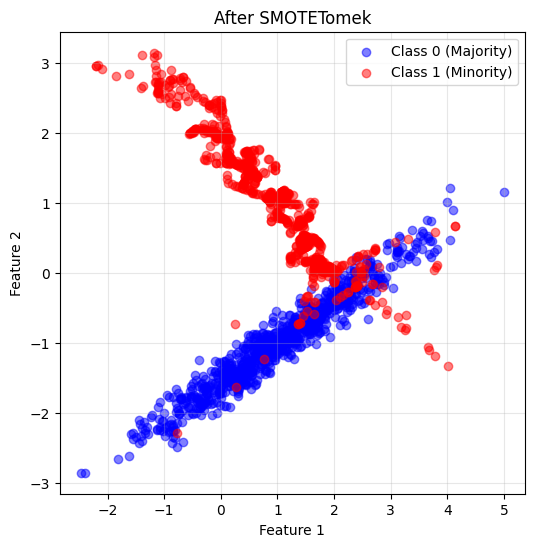

Class distribution: Counter({np.int64(0): 865, np.int64(1): 865})
Class 0: 865 samples (50.00%)
Class 1: 865 samples (50.00%)
--------------------------------------------------


In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_stom, y_stom = smt.fit_resample(X, y)
plot_data(X_stom, y_stom, "After SMOTETomek")

## 7. NearMiss

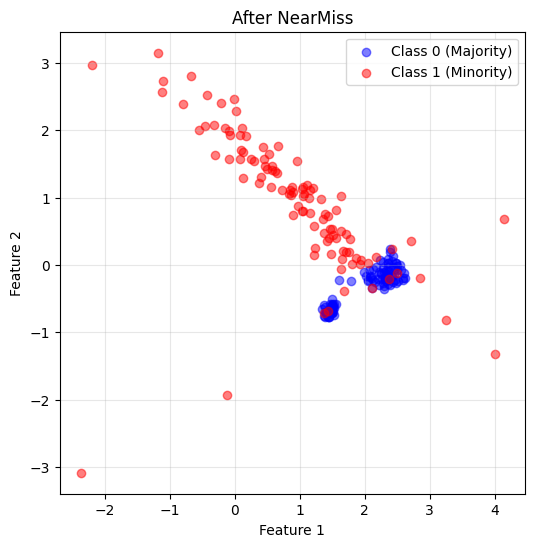

Class distribution: Counter({np.int64(0): 105, np.int64(1): 105})
Class 0: 105 samples (50.00%)
Class 1: 105 samples (50.00%)
--------------------------------------------------


In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)
X_nm, y_nm = nm.fit_resample(X, y)
plot_data(X_nm, y_nm, "After NearMiss")

# Algorithm-Level

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification

# Resampling methods
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Function to plot distributions
def plot_distribution(X, y, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.6, label='Class 0', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Class 1', edgecolor='k')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate an imbalanced dataset
# Create imbalanced dataset
X, y = make_classification(
        n_samples=500,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=(0.95, 0.05),
        random_state=42
    )

In [ ]:
X[0:10]

array([[ 1.00845498, -1.04700975],
       [ 1.04474105,  0.03007002],
       [ 1.02420498, -1.79714286],
       [ 0.12188007,  1.05937142],
       [ 0.41182173,  0.32915639],
       [ 1.26221796, -0.7607263 ],
       [ 0.56690647, -0.71561425],
       [-0.01966368,  1.43101405],
       [ 0.05209405, -0.29086399],
       [ 1.84107306, -1.7303942 ]])

Original class distribution: Counter({np.int64(0): 474, np.int64(1): 26})


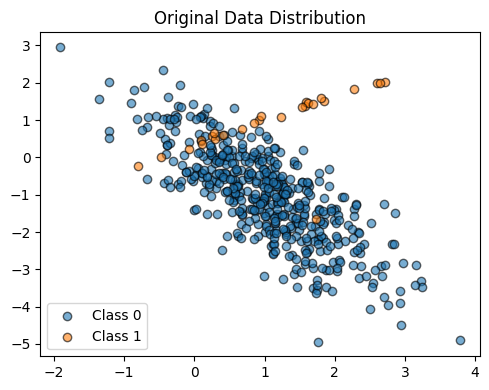

In [ ]:
print("Original class distribution:", Counter(y))
plot_distribution(X, y, "Original Data Distribution")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

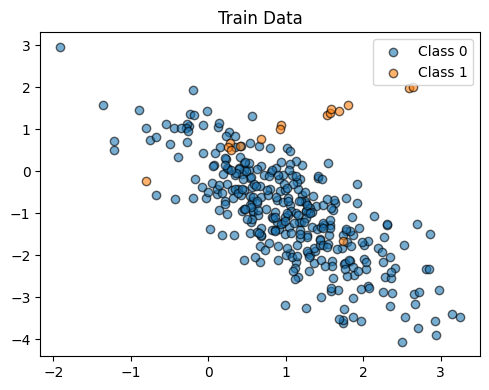

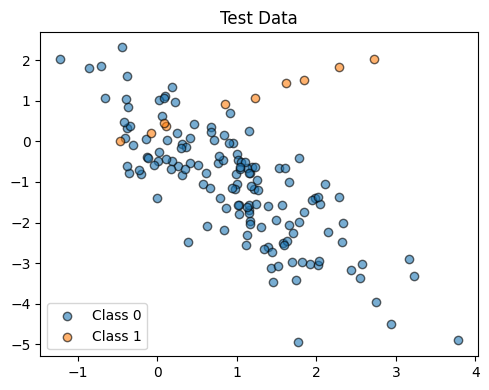

In [ ]:
plot_distribution(X_train, y_train, "Train Data")
plot_distribution(X_test, y_test, "Test Data")

In [ ]:
# Train a Random Forest Classifier on the original imbalanced data
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
print(classification_report(y_test, y_pred_original))

# Train a Random Forest Classifier on SMOTE resampled data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_smote, y_smote)
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

# Train a Random Forest Classifier on RandomOverSampler resampled data
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
rf_ros = RandomForestClassifier(random_state=42)
rf_ros.fit(X_ros, y_ros)
y_pred_ros = rf_ros.predict(X_test)
print(classification_report(y_test, y_pred_ros))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       140
           1       0.86      0.60      0.71        10

    accuracy                           0.97       150
   macro avg       0.91      0.80      0.84       150
weighted avg       0.96      0.97      0.96       150

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       140
           1       0.64      0.90      0.75        10

    accuracy                           0.96       150
   macro avg       0.82      0.93      0.86       150
weighted avg       0.97      0.96      0.96       150

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       140
           1       0.86      0.60      0.71        10

    accuracy                           0.97       150
   macro avg       0.91      0.80      0.84       150
weighted avg       0.96      0.97      0.96       150



In [ ]:
# Train a Random Forest Classifier on the original imbalanced data with class weights
rf_weighted = RandomForestClassifier(random_state=42, class_weight={0:1, 1:9})
rf_weighted.fit(X_train, y_train)
y_pred_weighted = rf_weighted.predict(X_test)
print(classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       140
           1       1.00      0.60      0.75        10

    accuracy                           0.97       150
   macro avg       0.99      0.80      0.87       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
y_pred_proba = rf_original.predict_proba(X_test)
y_pred_proba[10:30]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.31, 0.69],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.97, 0.03],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.87, 0.13]])

In [ ]:
custom_threshold = 0.6
y_pred_adjusted = (y_pred_proba[:, 1] > custom_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       140
           1       1.00      0.60      0.75        10

    accuracy                           0.97       150
   macro avg       0.99      0.80      0.87       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
# Train a Balanced Random Forest Classifier on the original imbalanced data
rf_balanced = BalancedRandomForestClassifier(random_state=42)
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       140
           1       0.41      0.70      0.52        10

    accuracy                           0.91       150
   macro avg       0.69      0.81      0.74       150
weighted avg       0.94      0.91      0.92       150

